# Import all world bank datasets and melt to long format

In [25]:
import pandas as pd
import numpy as np

In [29]:
def world_bank_data_load_melt(path, skiprows = 4):
    
    df = pd.read_csv(path, skiprows = skiprows)
    
    indicator_name = df['Indicator Name'][0]
    
    df = df.drop(columns = ['Indicator Code', 'Indicator Name'], axis = 1)
    
    df = pd.melt(df, id_vars= ['Country Name', 'Country Code'], var_name = 'Year', value_name = indicator_name)
    
    df[indicator_name] = np.log1p(df[indicator_name])
    
    return df
    

In [27]:
base_path = '../../raw_data/'

cereal_path = base_path + 'Cereal_Yield/API_AG.YLD.CREL.KG_DS2_en_csv_v2_4772233.csv'
machinery_path = base_path + 'Machinery/API_AG.LND.TRAC.ZS_DS2_en_csv_v2_4771695.csv'
ag_fish_forest_percentGDP_path = base_path + 'Agr_For_Fish_PercentageGDP/API_NV.AGR.TOTL.ZS_DS2_en_csv_v2_4771963.csv'
arable_land_path = base_path + 'Arable_Land/API_AG.LND.ARBL.ZS_DS2_en_csv_v2_4771464.csv'
arable_land_person_path = base_path + 'Arable_Per_Person/API_AG.LND.ARBL.HA.PC_DS2_en_csv_v2_4772118.csv'
crop_land_path = base_path + 'CropLand/API_AG.LND.CROP.ZS_DS2_en_csv_v2_4772245.csv'
rural_female_path = base_path + 'employment_rural/API_SL.AGR.EMPL.FE.ZS_DS2_en_csv_v2_4771601.csv'
rural_male_path = base_path + 'employment_rural/API_SL.AGR.EMPL.MA.ZS_DS2_en_csv_v2_4772741.csv'
energy_intensive_path = base_path + 'Energy_intensity_Primary_Energy/API_EG.EGY.PRIM.PP.KD_DS2_en_csv_v2_4772561.csv'
fertilizer_path = base_path + 'Fertilizer/API_AG.CON.FERT.ZS_DS2_en_csv_v2_4772365.csv'
fwater_withdrawl_path = base_path + 'Freshwater_Withdrawl_Total/API_ER.H2O.FWTL.K3_DS2_en_csv_v2_4771571.csv'
investment_transport_path = base_path + 'investment_transport/API_IE.PPI.TRAN.CD_DS2_en_csv_v2_4772868.csv'
irrigation_path = base_path + 'irrigation/API_AG.LND.IRIG.AG.ZS_DS2_en_csv_v2_4771631.csv'
natural_resources_gdp_path = base_path + 'Natural_Resources_GDP/API_NY.GDP.TOTL.RT.ZS_DS2_en_csv_v2_4772391.csv'
total_water_path = base_path + 'total_water/API_ER.H2O.INTR.K3_DS2_en_csv_v2_4772447.csv'

In [30]:
cereal = world_bank_data_load_melt(cereal_path)
machinery = world_bank_data_load_melt(machinery_path)
ag_fish_forest_percentGDP = world_bank_data_load_melt(ag_fish_forest_percentGDP_path)
arable_land = world_bank_data_load_melt(arable_land_path)
arable_land_person = world_bank_data_load_melt(arable_land_person_path)
crop_land = world_bank_data_load_melt(crop_land_path)
rural_female = world_bank_data_load_melt(rural_female_path)
rural_male = world_bank_data_load_melt(rural_male_path)
energy_intensive = world_bank_data_load_melt(energy_intensive_path)
fertilizer = world_bank_data_load_melt(fertilizer_path)
fwater_withdrawl = world_bank_data_load_melt(fwater_withdrawl_path)
investment_transport = world_bank_data_load_melt(investment_transport_path)
irrigation = world_bank_data_load_melt(irrigation_path)
natural_resources_gdp = world_bank_data_load_melt(natural_resources_gdp_path)
total_water = world_bank_data_load_melt(total_water_path)

# Explore Cereal Target

- Like most of the values in these datasets, the data needs to be log transformed to generate a more normal distribution

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [31]:
cereal.head()

,Country Name,Country Code,Year,Cereal yield (kg per hectare)
0,Aruba,ABW,1960,NaN
1,Africa Eastern and Southern,AFE,1960,NaN
2,Afghanistan,AFG,1960,NaN
3,Africa Western and Central,AFW,1960,NaN
4,Angola,AGO,1960,NaN


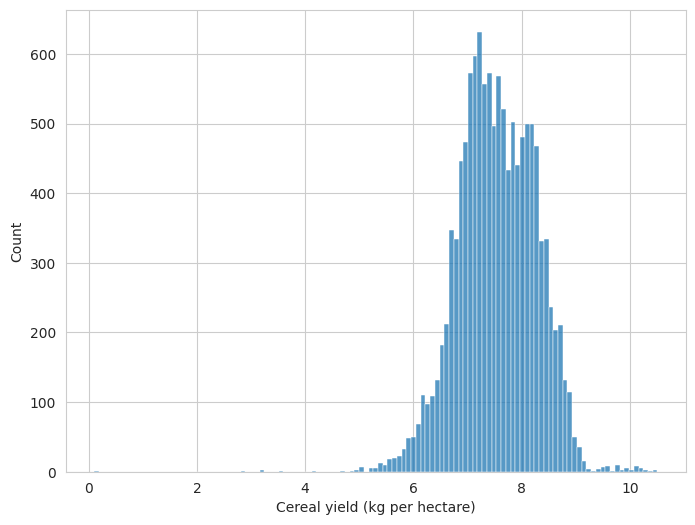

In [36]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.histplot(data = cereal, x = 'Cereal yield (kg per hectare)');

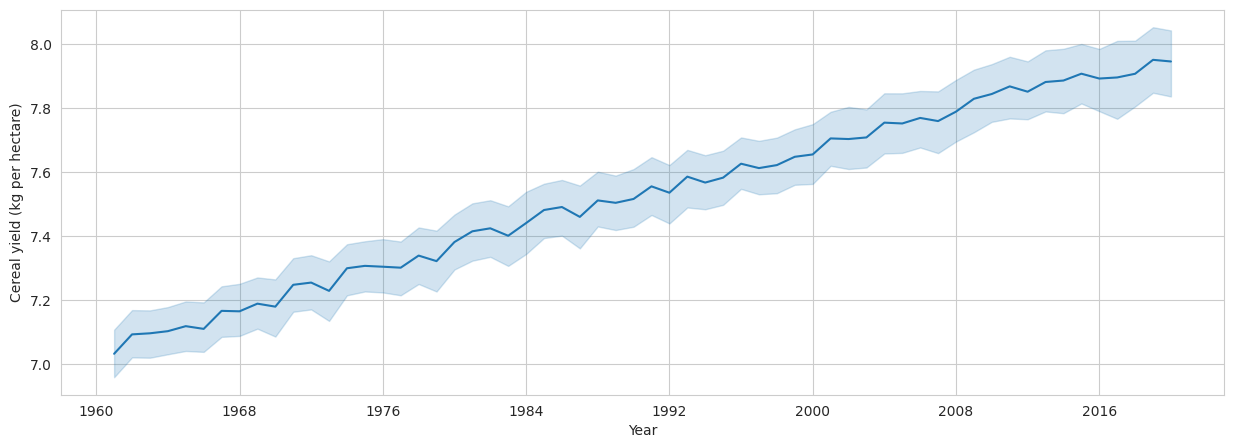

In [37]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.lineplot(data = cereal, x = 'Year', y = 'Cereal yield (kg per hectare)')
ax.xaxis.set_major_locator(plt.MaxNLocator(10));

- #### So it's obvious that we have a strong temporal element on the global level with yields steadily growing since the 1960's. 
- #### So there should be a number of influencing factors that will be correlated positively or negatively with this change
- #### The key will also be capturing the variations within this upward trend

# Include machinery, fertilizer and irrigation

In [38]:
def merge_world_bank_data(df, df_to_merge):
    df = pd.merge(left = df, right = df_to_merge)
    return df

In [48]:
df = merge_world_bank_data(cereal, fertilizer)
df = merge_world_bank_data(df, fwater_withdrawl)
df = merge_world_bank_data(df, machinery)
df.head()

,Country Name,Country Code,Year,Cereal yield (kg per hectare),Fertilizer consumption (kilograms per hectare of arable land),"Annual freshwater withdrawals, total (billion cubic meters)","Agricultural machinery, tractors per 100 sq. km of arable land"
0,Aruba,ABW,1960,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,1960,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1960,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,1960,NaN,NaN,NaN,NaN
4,Angola,AGO,1960,NaN,NaN,NaN,NaN


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16758 entries, 0 to 16757
Data columns (total 7 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Country Name                                                    16758 non-null  object 
 1   Country Code                                                    16758 non-null  object 
 2   Year                                                            16758 non-null  object 
 3   Cereal yield (kg per hectare)                                   12321 non-null  float64
 4   Fertilizer consumption (kilograms per hectare of arable land)   10596 non-null  float64
 5   Agricultural irrigated land (% of total agricultural land)      986 non-null    float64
 6   Agricultural machinery, tractors per 100 sq. km of arable land  7807 non-null   float64
dtypes: float64(4), object(3)
memory usage: 1.0+ MB


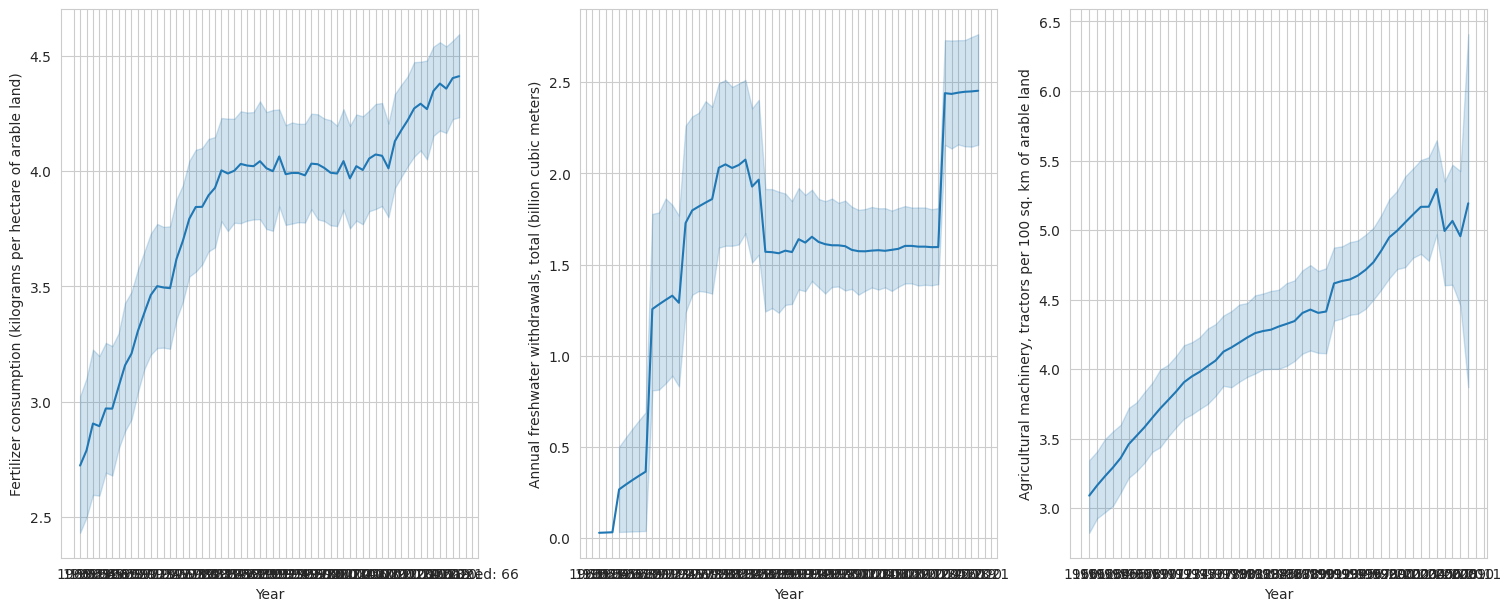

In [49]:
fig, ax = plt.subplots(1, 3, constrained_layout = True, figsize = (15, 6))

sns.lineplot(data = df, 
                x = 'Year', 
                y = 'Fertilizer consumption (kilograms per hectare of arable land)',
                ax = ax[0])

sns.lineplot(data = df, 
                x = 'Year', 
                y = 'Annual freshwater withdrawals, total (billion cubic meters)',
                ax = ax[1])

sns.lineplot(data = df, 
                x = 'Year', 
                y = 'Agricultural machinery, tractors per 100 sq. km of arable land',
                ax = ax[2]);

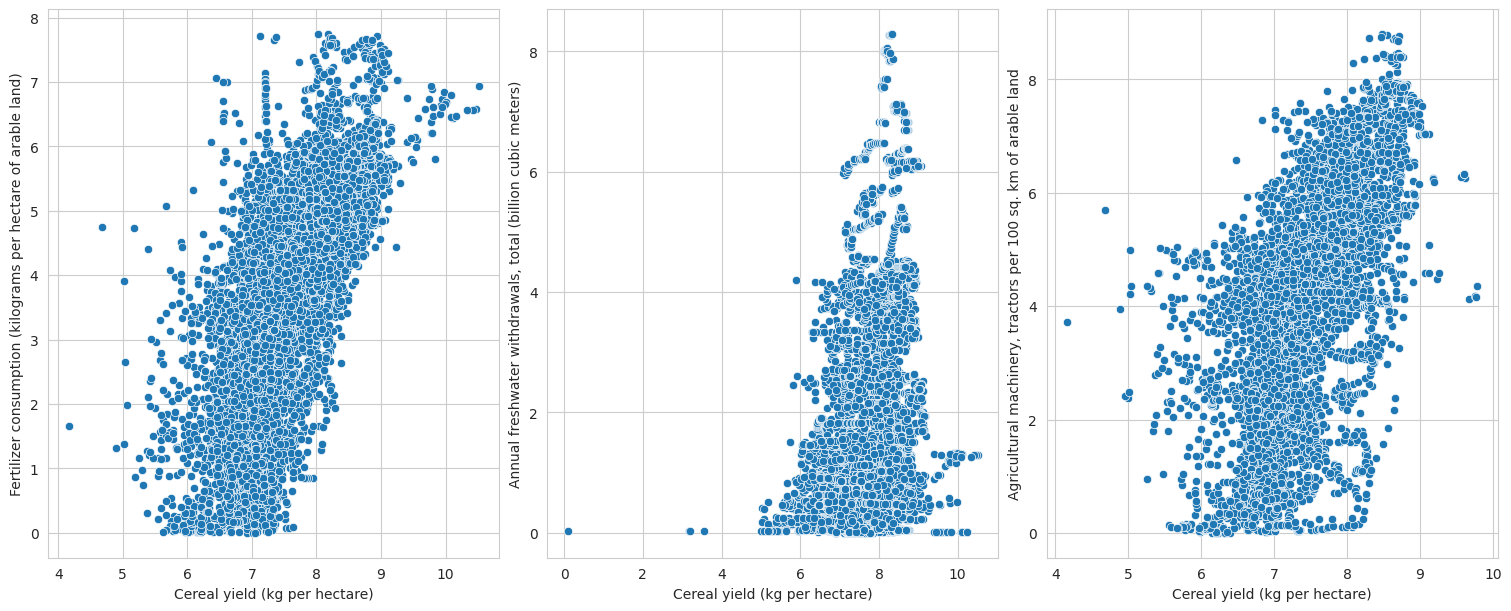

In [50]:
fig, ax = plt.subplots(1, 3, constrained_layout = True, figsize = (15, 6))

sns.scatterplot(data = df, 
                x = 'Cereal yield (kg per hectare)', 
                y = 'Fertilizer consumption (kilograms per hectare of arable land)',
                ax = ax[0])

sns.scatterplot(data = df, 
                x = 'Cereal yield (kg per hectare)', 
                y = 'Annual freshwater withdrawals, total (billion cubic meters)',
                ax = ax[1])

sns.scatterplot(data = df, 
                x = 'Cereal yield (kg per hectare)', 
                y = 'Agricultural machinery, tractors per 100 sq. km of arable land',
                ax = ax[2]);

In [51]:
df.to_parquet('../data/fertilizer_machinery_waterwithdrawl.pq')

### Merge all data into one dataframe to explore

In [52]:
df = merge_world_bank_data(df, ag_fish_forest_percentGDP)
df = merge_world_bank_data(df, arable_land)
df = merge_world_bank_data(df, arable_land_person)
df = merge_world_bank_data(df, crop_land)
df = merge_world_bank_data(df, rural_female)
df = merge_world_bank_data(df, rural_male)
df = merge_world_bank_data(df, energy_intensive)
df = merge_world_bank_data(df, natural_resources_gdp)
df = merge_world_bank_data(df, total_water)
df.head()

,Country Name,Country Code,Year,Cereal yield (kg per hectare),Fertilizer consumption (kilograms per hectare of arable land),"Annual freshwater withdrawals, total (billion cubic meters)","Agricultural machinery, tractors per 100 sq. km of arable land","Agriculture, forestry, and fishing, value added (% of GDP)",Arable land (% of land area),Arable land (hectares per person),Permanent cropland (% of land area),"Employment in agriculture, female (% of female employment) (modeled ILO estimate)","Employment in agriculture, male (% of male employment) (modeled ILO estimate)",Energy intensity level of primary energy (MJ/$2017 PPP GDP),Total natural resources rents (% of GDP),"Renewable internal freshwater resources, total (billion cubic meters)"
0,Aruba,ABW,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df = df.dropna(subset = ['Cereal yield (kg per hectare)'])

In [62]:
df['Employment in agriculture, (modeled ILO estimate)'] = df[['Employment in agriculture, female (% of female employment) (modeled ILO estimate)', 
                                                              'Employment in agriculture, male (% of male employment) (modeled ILO estimate)']].mean(axis = 1)

df = df.drop(columns = ['Employment in agriculture, female (% of female employment) (modeled ILO estimate)', 
                                                              'Employment in agriculture, male (% of male employment) (modeled ILO estimate)'])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12321 entries, 267 to 16225
Data columns (total 15 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Country Name                                                           12321 non-null  object 
 1   Country Code                                                           12321 non-null  object 
 2   Year                                                                   12321 non-null  object 
 3   Cereal yield (kg per hectare)                                          12321 non-null  float64
 4   Fertilizer consumption (kilograms per hectare of arable land)          10110 non-null  float64
 5   Annual freshwater withdrawals, total (billion cubic meters)            5788 non-null   float64
 6   Agricultural machinery, tractors per 100 sq. km of arable land         6984 non-null

In [64]:
df.to_parquet('../data/all_variables.pq')